In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Q.1 Numerical Integration

## (a) Use Composite Trapezoidal rule

$$
\int_a^b f(x) \mathrm{d} x=\frac{h}{2}\left[f(a)+2 \sum_{j=1}^{n-1} f\left(x_j\right)+f(b)\right]-\frac{b-a}{12} h^2 f^{\prime \prime}(\xi)
$$

In [5]:
def compositeTrapezoidal(f, a, b, n):
    
    h = (b-a) / n 
    s = 0.0

    for i in range(n):
        left = a + h * i 
        right = a + h * (i + 1)
        s = s + (h / 2) * (f(left) + f(right))
        pass

    return s 
    pass

def func(r):

    rho = 1.2  # [0 -3 0 0 0 0 0]
    v_list = [10, 9.80, 9.60, 9.30, 9.06, 8.68, 8.18, 7.41, 0]
    v = v_list[round(100 * r)]

    result = rho * v * 2 * np.pi * r 

    return result
    pass

print("Use Composite Trapezoidal rule: " + str(compositeTrapezoidal(func, 0, 0.08, 8)))

Use Composite Trapezoidal rule: 0.17906324143224958


## (b) Use Composite Simpson’s rule 

$$
\int_a^b f(x) \mathrm{d} x=\frac{h}{3}\left[f(a)+2 \sum_{j=1}^{n / 2-1} f\left(x_{2 j}\right)+4 \sum_{j=1}^{n / 2} f\left(x_{2 j-1}\right)+f(b)\right]-\frac{b-a}{180} h^4 f^{(4)}(\xi)
$$

In [6]:
def compositeSimpson(f, a, b, n):

    h = (b-a) / n 
    s = 0.0

    for i in range(n):
        left = a + h * i 
        right = a + h * (i + 1)
        s = s + (h / 6) * (f(left) + 4*f((left + right)/2) + f(right))
        pass

    return s 
    pass

def func(r):

    rho = 1.2  # [0 -3 0 0 0 0 0]
    v_list = [10, 9.80, 9.60, 9.30, 9.06, 8.68, 8.18, 7.41, 0]
    v = v_list[round(100 * r)]

    result = rho * v * 2 * np.pi * r 

    return result
    pass

print("Use Composite Simpson's rule: " + str(compositeSimpson(func, 0, 0.08, 4)))

Use Composite Simpson's rule: 0.18621350631182


## (c) Romberg Integration

Select a method of your choice that you think is more accurate than the two methods above.

In [7]:
def compositeTrapezoidal(f, a, b, n):
    
    h = (b-a) / n 
    s = 0.0

    for i in range(n):
        left = a + h * i 
        right = a + h * (i + 1)
        s = s + (h / 2) * (f(left) + f(right))
        pass

    return s 
    pass

def rombergIntegration(f, a, b, nmax, eps=1e-12): 
    
    R = np.zeros((nmax, nmax)) 
    nIter = 0

    for i in range(0, nmax):
        nIter = nIter + 1 
        N = 2 ** i 
        R[i,0] = compositeTrapezoidal(f,a,b,N)
        for k in range(0,i):
            n = k + 2
            R[i,k+1] = (4**(n-1) * R[i,k] - R[i-1,k]) / (4**(n-1) - 1)
            pass
        if (i > 0):
            if (abs(R[i,k+1] - R[i,k]) < eps):
                break
            pass
        pass
    return R[0:n,0:n], nIter 
    pass

def func(r):

    rho = 1.2  # [0 -3 0 0 0 0 0]
    v_list = [10, 9.80, 9.60, 9.30, 9.06, 8.68, 8.18, 7.41, 0]
    v = v_list[round(100 * r)]

    result = rho * v * 2 * np.pi * r 

    return result
    pass

rombergIntegration(func, 0, 0.08, 4)

(array([[0.        , 0.        , 0.        , 0.        ],
        [0.10929727, 0.14572969, 0.        , 0.        ],
        [0.15761245, 0.17371751, 0.17558336, 0.        ],
        [0.17906324, 0.18621351, 0.18704657, 0.18722853]]),
 4)

# Q.2 ODE initial value problem

## (a) Use Euler method

$$
\begin{cases} 
k_0 = k(1s) = 1.0 m^2/s^2 \\
\epsilon_0 = \epsilon(1s) = 0.2176 m^2/s^3 \\
\frac{\partial{k}}{\partial{t}} = -\epsilon = f(t,k,\epsilon) \\
\frac{\partial{\epsilon}}{\partial{t}} = -C\frac{\epsilon^2}{k} = f(t,k,\epsilon) \\
k_{i+1} = k_i + hf(t_i,k_i,\epsilon_i) \\
\epsilon_{i+1} = \epsilon_i + hg(t_i,k_i,\epsilon_i)
\end{cases} 
$$


In [8]:
def odeEuler(dy, dz, y0, z0, h, start, end):
    nSteps = int((end - start) / h)
    y = y0
    z = z0
    t = start 
    result_y = []
    result_z = []
    result_y.append(y)
    result_z.append(z)
    
    for i in range(nSteps):
        y = y + h * dy(t,y,z)
        z = z + h * dz(t,y,z)
        t = t + h

        result_y.append(y)
        result_z.append(z)

    # return y,z 
    return result_y, result_z
    pass

def dk(t,k,eps):
    return - eps
    pass

def deps(t,k,eps):
    C = 1.83  # Constant
    return - C * eps * eps / k
    pass

k0 = 1  # [0 2 -2 0 0 0 0]
eps0 = 0.2176  # [0 2 -3 0 0 0 0]
h = 0.2 

start = 1 
end = 5 

odeEuler(dk, deps, k0, eps0, h, start, end)

([1,
  0.95648,
  0.916583706122449,
  0.8798653403335093,
  0.8459511266501972,
  0.8145250215017016,
  0.7853177655076,
  0.7580983758620219,
  0.7326674588067704,
  0.7088518976788636,
  0.6865005932529005,
  0.6654810180205424,
  0.6456764064486072,
  0.6269834468174031,
  0.6093103720604043,
  0.592575370544581,
  0.5767052553032638,
  0.5616343434964317,
  0.5473035079779082,
  0.5336593706148094,
  0.5206536130219911],
 [0.2176,
  0.1994814693877551,
  0.18359182894469867,
  0.16957106841656044,
  0.15713052574247816,
  0.14603627997050772,
  0.13609694822789092,
  0.1271545852762576,
  0.11907780563953418,
  0.11175652212981535,
  0.10509787616179064,
  0.09902305785967584,
  0.0934647981560204,
  0.08836537378499448,
  0.08367500757911625,
  0.07935057620658613,
  0.07535455903416023,
  0.0716541775926176,
  0.06822068681549384,
  0.06502878796409163,
  0.06205613974665294])

## (b) Use the modified Euler method

$$
\begin{cases} 
k_0 = k(1s) = 1.0 m^2/s^2 \\
\epsilon_0 = \epsilon(1s) = 0.2176 m^2/s^3 \\
\frac{\partial{k}}{\partial{t}} = -\epsilon = f(t,k,\epsilon) \\
\frac{\partial{\epsilon}}{\partial{t}} = -C\frac{\epsilon^2}{k} = f(t,k,\epsilon) \\
K_1 = hf(t_i,k_i,\epsilon_i) \\
M_1 = hg(t_i,k_i,\epsilon_i) \\
K_2 = hf(t_i+\alpha h,k_i+\alpha K_1,\epsilon + \alpha M_1) \\
M_2 = hg(t_i+\alpha h,k_i+\alpha K_1,\epsilon + \alpha M_1) \\
k_{i+1} = k_i + (aK_1+bK_2) \\
\epsilon_{i+1} = \epsilon_i + (aM_1+bM_2)
\end{cases} 
$$

For modified Euler method: 
$$
a = 0 \quad b = 1 \quad \alpha = 1/2
$$

In [9]:
def twoStepRungeKutta_ModifiedEuler(dy, dz, y0, z0, h, start, end):
    """
    twoStepRungeKutta: Midpoint
    a = 1/2, b = 1/2, alpha = 1
    """
    a, b, alpha = 1/2, 1/2, 1
    nSteps = int((end - start) / h)
    y = y0
    z = z0
    t = start 
    result_y = []
    result_z = []
    result_y.append(y)
    result_z.append(z)
    
    for i in range(nSteps):
        K1 = h * dy(t,y,z)
        M1 = h * dz(t,y,z)
        K2 = h * dy(t+alpha*h, y+alpha*K1, z+alpha*M1)
        M2 = h * dz(t+alpha*h, y+alpha*K1, z+alpha*M1)

        y = y + (a*K1 + b*K2)
        z = z + (a*M1 + b*M2)
        t = t + h

        result_y.append(y)
        result_z.append(z)

    # return y,z 
    return result_y, result_z
    pass

def dk(t,k,eps):
    return - eps
    pass

def deps(t,k,eps):
    C = 1.83  # Constant
    return - C * eps * eps / k
    pass

k0 = 1  # [0 2 -2 0 0 0 0]
eps0 = 0.2176  # [0 2 -3 0 0 0 0]
h = 0.2 

start = 1 
end = 5 

twoStepRungeKutta_ModifiedEuler(dk, deps, k0, eps0, h, start, end)

([1,
  0.958213001216,
  0.9195079247409449,
  0.8835657140525406,
  0.8501092113490456,
  0.8188965656617463,
  0.7897158388189571,
  0.7623805641488639,
  0.7367260682505951,
  0.7126064079374461,
  0.6898918061948516,
  0.6684664952992624,
  0.6482268939927439,
  0.6290800601733935,
  0.6109423719525793,
  0.5937383988948313,
  0.577399932354194,
  0.5618651494729575,
  0.5470778899340341,
  0.5329870282003288,
  0.5195459269202584],
 [0.2176,
  0.20126125641436854,
  0.18664410049248475,
  0.17351847894280178,
  0.16169116158127278,
  0.15099893477371837,
  0.14130321148216884,
  0.13248573205062916,
  0.12444511155625457,
  0.11709404916992978,
  0.11035705888695352,
  0.10416861362474719,
  0.09847161914003728,
  0.09321615268799695,
  0.08835841539960686,
  0.08385985812279251,
  0.07968644878092052,
  0.07580805575256878,
  0.07219792681506634,
  0.06883224715300401,
  0.06568976306045216])

## (c) Use the 4-th order Runge-Kutta method 

$$
\begin{cases}
k_0 = k(1s) = 1.0 m^2/s^2 \\
\epsilon_0 = \epsilon(1s) = 0.2176 m^2/s^3 \\
\frac{\partial{k}}{\partial{t}} = -\epsilon = f(t,k,\epsilon) \\
\frac{\partial{\epsilon}}{\partial{t}} = -C\frac{\epsilon^2}{k} = f(t,k,\epsilon) \\
K_1 = hf(t_i,k_i,\epsilon_i) \\
M_1 = hg(t_i,k_i,\epsilon_i) \\
K_2 = hf(t_i+\frac{h}{2},k_i+\frac{1}{2}K_1,\epsilon_i+\frac{1}{2}M_1) \\
M_2 = hg(t_i+\frac{h}{2},k_i+\frac{1}{2}K_1,\epsilon_i+\frac{1}{2}M_1) \\
K_3 = hf(t_i+\frac{h}{2},k_i+\frac{1}{2}K_2,\epsilon_i+\frac{1}{2}M_2) \\
M_3 = hg(t_i+\frac{h}{2},k_i+\frac{1}{2}K_2,\epsilon_i+\frac{1}{2}M_2) \\
K_4 = hf(t_i+h,k_i+K_3,\epsilon_i+M_3) \\
M_4 = hg(t_i+h,k_i+K_3,\epsilon_i+M_3) \\
k_{i+1} = k_i + \frac{1}{6} (K_1 + 2K_2 + 2K_3 + K_4) \\
\epsilon_{i+1} = \epsilon_i + \frac{1}{6} (M_1 + 2M_2 + 2M_3 + M_4)
\end{cases}
$$

In [10]:
def fourStepRungeKutta_Quadratic(dy, dz, y0, z0, h, start, end):
    nSteps = int((end - start) / h)  # Steps
    y = y0
    z = z0
    t = start
    result_y = []
    result_z = []
    result_y.append(y)
    result_z.append(z)

    for i in range(nSteps):
        K1 = h * dy(t,y,z)
        M1 = h * dz(t,y,z)
        K2 = h * dy(t+h/2, y+K1/2, z+M1/2)
        M2 = h * dz(t+h/2, y+K1/2, z+M1/2)
        K3 = h * dy(t+h/2, y+K2/2, z+M2/2)
        M3 = h * dz(t+h/2, y+K2/2, z+M2/2)
        K4 = h * dy(t+h, y+K3, z+M3)
        M4 = h * dz(t+h, y+K3, z+M3)

        y = y + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
        z = z + 1/6 * (M1 + 2*M2 + 2*M3 + M4)
        t = t + h

        result_y.append(y)
        result_z.append(z)

    # return y,z 
    return result_y, result_z
    pass

def dk(t,k,eps):
    return - eps
    pass

def deps(t,k,eps):
    C = 1.83  # Constant
    return - C * eps * eps / k
    pass

k0 = 1  # [0 2 -2 0 0 0 0]
eps0 = 0.2176  # [0 2 -3 0 0 0 0]
h = 1 

start = 1 
end = 5 

fourStepRungeKutta_Quadratic(dk, deps, k0, eps0, h, start, end)

([1,
  0.818846870515588,
  0.6898321801447953,
  0.5936887662799374,
  0.5195131648314744],
 [0.2176,
  0.150943715231596,
  0.11029463161537474,
  0.0838044340865933,
  0.06564422389157698])

# Q.3 Non-linear equations

$$
\begin{gathered}
y_{+}=U_{+}+e^{-\kappa B}\left[e^{\kappa U_{+}}-1-\kappa U_{+}-\frac{1}{2 !}\left(\kappa U_{+}\right)^2-\frac{1}{3 !}\left(\kappa U_{+}\right)^3-\frac{1}{4 !}\left(\kappa U_{+}\right)^4\right] \\
f(U_+)=U_{+}+e^{-\kappa B}\left[e^{\kappa U_{+}}-1-\kappa U_{+}-\frac{1}{2 !}\left(\kappa U_{+}\right)^2-\frac{1}{3 !}\left(\kappa U_{+}\right)^3-\frac{1}{4 !}\left(\kappa U_{+}\right)^4\right]-y_{+}=0 \\
f(U_+)=U_{+}+e^{-\kappa B}\left[e^{\kappa U_{+}}-1-\kappa U_{+}-\frac{1}{2 !}\left(\kappa U_{+}\right)^2-\frac{1}{3 !}\left(\kappa U_{+}\right)^3-\frac{1}{4 !}\left(\kappa U_{+}\right)^4\right]-\frac{Uy}{U_+\gamma}=0
\end{gathered}
$$

$$
y_{+}=\frac{u_\tau y}{\nu}, \quad U_{+}=\frac{U}{u_\tau},
$$
$$
\kappa=0.41, \quad B=5.1
$$

According to wind tunnel experimental data: 

$$
\gamma = 1.5 \times 10^{-5} \ m^2/s, \quad \rho = 1.25 \ kg/m^3, \quad y = 0.01 \ m, \quad U = 21 \ m/s
$$

## (a) Use bisection method

In [11]:
def bisect(f, a, b, tolerance):
    if (f(a) * f(b) < 0):
        while (np.abs(a-b)/2.0 > tolerance and np.abs(tauWall(a)-tauWall(b))/2.0 > tolerance):
            p = (a + b) / 2.0
            if (f(a) * f(p) < 0):
                b = p 
            elif (f(a) * f(p) > 0):
                a = p
            else:
                return p
                pass
            pass
        pass
    else: 
        print("f(a)*f(b) is non-negative!")
        pass

    print("UPlus = " + str((a+b)/2.0) + ",  tau_wall = " + str(tauWall((a + b) / 2.0)))
    return tauWall((a + b) / 2.0)
    pass

def f(UPlus):

    # Constants
    kappa = 0.41  # [0 0 0 0 0 0 0]
    B = 5.1  # [0 0 0 0 0 0 0]
    gamma = 1.5e-5  # [0 2 -1 0 0 0 0]
    rho = 1.25  # [1 -3 0 0 0 0 0]
    U = 21.0  # [0 1 -1 0 0 0 0]
    y = 0.01  # [0 1 0 0 0 0 0]

    YPlus = U * y / UPlus / gamma 
    func = UPlus + np.exp(-kappa * B) * \
        (np.exp(kappa * UPlus) - 1 - kappa * UPlus - np.power(kappa*UPlus,2)/2 - \
            np.power(kappa*UPlus,3)/6 - np.power(kappa*UPlus,4)/24) - YPlus

    return func
    pass

def tauWall(UPlus): 

    # Constants
    kappa = 0.41  # [0 0 0 0 0 0 0]
    B = 5.1  # [0 0 0 0 0 0 0]
    gamma = 1.5e-5  # [0 2 -1 0 0 0 0]
    rho = 1.25  # [1 -3 0 0 0 0 0]
    U = 21.0  # [0 1 -1 0 0 0 0]
    y = 0.01  # [0 1 0 0 0 0 0]

    U_tau = U / UPlus
    tau_wall = rho * U_tau * U_tau

    return tau_wall 
    pass

a = 21 
b = 22
tol = 1e-3

bisect(f, a, b, tol)


UPlus = 21.0546875,  tau_wall = 1.2435149266318097


1.2435149266318097

## (b) Use Newton’s method 

$$
f(U_+)=U_{+}+e^{-\kappa B}\left[e^{\kappa U_{+}}-1-\kappa U_{+}-\frac{1}{2 !}\left(\kappa U_{+}\right)^2-\frac{1}{3 !}\left(\kappa U_{+}\right)^3-\frac{1}{4 !}\left(\kappa U_{+}\right)^4\right]-\frac{Uy}{U_+\gamma}=0 
$$
$$
\frac{df(U_+)}{dU_+}=1+e^{-\kappa B}\left[\kappa e^{\kappa U_{+}}-\kappa-\kappa^2U_+-\frac{1}{2}\kappa^3U_+^2-\frac{1}{6}\kappa^4U_+^3\right]+\frac{Uy}{U_+^2\gamma}
$$

In [12]:
def newton(f, dfdx, x0, tolerance, maxIter=100):

    iter = 0
    currentTol = tolerance + 1.0
    currentTol_tauWall = tolerance + 1.0
    x1 = x0 
    while (currentTol > tolerance and iter < maxIter and currentTol_tauWall > tolerance):
        iter = iter + 1
        x1 = x0 - f(x0) / dfdx(x0)
        currentTol = abs(x1 - x0)
        currentTol_tauWall = abs(tauWall(x1)-tauWall(x0))
        x0 = x1
        pass

    print("iter = " + str(iter) + ",  UPlus = " + str(x1) + ",  tau_wall = " + str(tauWall(x1)))
    return tauWall(x1)
    pass

def f(UPlus):

    # Constants
    kappa = 0.41  # [0 0 0 0 0 0 0]
    B = 5.1  # [0 0 0 0 0 0 0]
    gamma = 1.5e-5  # [0 2 -1 0 0 0 0]
    rho = 1.25  # [1 -3 0 0 0 0 0]
    U = 21.0  # [0 1 -1 0 0 0 0]
    y = 0.01  # [0 1 0 0 0 0 0]

    YPlus = U * y / UPlus / gamma 
    func = UPlus + np.exp(-kappa * B) * \
        (np.exp(kappa * UPlus) - 1 - kappa * UPlus - np.power(kappa*UPlus,2)/2 - \
            np.power(kappa*UPlus,3)/6 - np.power(kappa*UPlus,4)/24) - YPlus

    return func
    pass

def dfdx(UPlus):

    # Constants
    kappa = 0.41  # [0 0 0 0 0 0 0]
    B = 5.1  # [0 0 0 0 0 0 0]
    gamma = 1.5e-5  # [0 2 -1 0 0 0 0]
    rho = 1.25  # [1 -3 0 0 0 0 0]
    U = 21.0  # [0 1 -1 0 0 0 0]
    y = 0.01  # [0 1 0 0 0 0 0]

    func = 1 + np.exp(-kappa * B) * \
        (kappa * np.exp(kappa * UPlus) - kappa - kappa * kappa * UPlus - \
            np.power(kappa,3)*np.power(UPlus,2)/2 - \
                np.power(kappa,4)*np.power(UPlus,3)/6) + U * y / UPlus / UPlus / gamma 

    return func 
    pass

def tauWall(UPlus): 

    # Constants
    kappa = 0.41  # [0 0 0 0 0 0 0]
    B = 5.1  # [0 0 0 0 0 0 0]
    gamma = 1.5e-5  # [0 2 -1 0 0 0 0]
    rho = 1.25  # [1 -3 0 0 0 0 0]
    U = 21.0  # [0 1 -1 0 0 0 0]
    y = 0.01  # [0 1 0 0 0 0 0]

    U_tau = U / UPlus
    tau_wall = rho * U_tau * U_tau

    return tau_wall 
    pass

x0 = 20
tol = 1e-3

newton(f, dfdx, x0, tol)


iter = 3,  UPlus = 21.0489990577974,  tau_wall = 1.2441871313850248


1.2441871313850248

## (c) Try to find a fixed point iteration formula that converges 

$$
f(U_+)=U_{+}+e^{-\kappa B}\left[e^{\kappa U_{+}}-1-\kappa U_{+}-\frac{1}{2 !}\left(\kappa U_{+}\right)^2-\frac{1}{3 !}\left(\kappa U_{+}\right)^3-\frac{1}{4 !}\left(\kappa U_{+}\right)^4\right]-\frac{Uy}{U_+\gamma}=0
$$
$$
U_+=B+\frac{1}{\kappa}ln\left\{-U_++e^{-\kappa B}\left[1+\kappa U_{+}+\frac{1}{2 !}\left(\kappa U_{+}\right)^2+\frac{1}{3 !}\left(\kappa U_{+}\right)^3+\frac{1}{4 !}\left(\kappa U_{+}\right)^4\right]+\frac{Uy}{U_+\gamma}\right\}=g\left(U_+\right)
$$

In [13]:
def g(UPlus):

    # Constants
    kappa = 0.41  # [0 0 0 0 0 0 0]
    B = 5.1  # [0 0 0 0 0 0 0]
    gamma = 1.5e-5  # [0 2 -1 0 0 0 0]
    rho = 1.25  # [1 -3 0 0 0 0 0]
    U = 21.0  # [0 1 -1 0 0 0 0]
    y = 0.01  # [0 1 0 0 0 0 0]

    YPlus = U * y / UPlus / gamma 
    func = B + 1/kappa * np.log(-UPlus + np.exp(-kappa*B) * \
        (1 + kappa * UPlus + np.power(kappa*UPlus,2)/2 + \
            np.power(kappa*UPlus,3)/6 + np.power(kappa*UPlus,4)/24) + YPlus)

    return func
    pass

# Convergence analysis

def functionMaxMin(function, start, end, interval=0.01):

    maximum = np.max(function(np.arange(start, end, interval)))
    minimum = np.min(function(np.arange(start, end, interval)))
    
    return minimum, maximum
    pass

def functionMaxDiff(function, start, end, interval=0.01):

    x_list = np.arange(start, end, interval)
    y_list = function(x_list)
    diff_list = []

    for i in range(len(x_list)-1):
        diff_list.append(np.abs((y_list[i+1]-y_list[i])/(x_list[i+1]-x_list[i])))
        pass

    diffMax = np.max(diff_list)

    return diffMax
    pass

start = 20
end = 22 

print("x in (" + str(start) + ", " + str(end) + "), y in " + str(functionMaxMin(g, start, end)))
print("Maximum absolute value of a derivative is " + str(functionMaxDiff(g, start, end)) + " less than 1.") 
print("Fixed point iteration is convergent in this condition.\n")

# Fixed point iteration method

def fixedPoint(function, x0, tolerance, maxIter=100):

    iter = 0
    currentTol = tolerance + 1.0
    currentTol_tauWall = tolerance + 1.0
    x1 = x0

    while (currentTol > tolerance and iter < maxIter and currentTol_tauWall > tolerance):
        iter = iter + 1
        x1 = function(x0)
        currentTol = abs(x1 - x0)
        currentTol_tauWall = abs(tauWall(x1)-tauWall(x0))
        x0 = x1
        pass

    print("iter = " + str(iter) + ",  UPlus = " + str(x1) + ",  tau_wall = " + str(tauWall(x1)))
    return tauWall(x1)
    pass

x0 = 20
tol = 1e-3

fixedPoint(g, x0, tol)



x in (20, 22), y in (20.971532217382702, 21.146694045673108)
Maximum absolute value of a derivative is 0.0987882446757583 less than 1.
Fixed point iteration is convergent in this condition.

iter = 4,  UPlus = 21.048921637667505,  tau_wall = 1.2441962839020162


1.2441962839020162

# Q.4 Interpolation

## (a) Use Lagrange interpolating polynomial

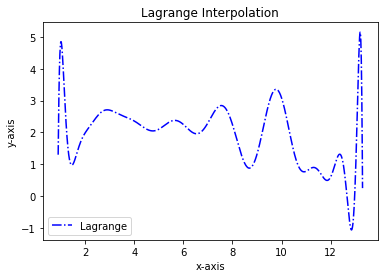

In [14]:
def lagrangeInterpolation(points, x):
    """
    Input: points, 确定的数据点
           x, 需要插值的点
    Output: 插值结果
    """
    n = len(points)
    y = 0
    for i in range(n):
        term = points[i, 1]
        for j in range(n):
            if(j!=i):
                term = term * (x - points[j,0])/(points[i,0]-points[j,0])
                # y = y + term  # 这个地方课本代码写错了
                pass
            pass
        y = y + term
        pass
    return y
    pass

points = np.array([ [0.9, 1.3],
                    [1.3, 1.5],
                    [1.9, 1.85],
                    [2.1, 2.1],
                    [2.6, 2.6],
                    [3.0, 2.7],
                    [3.9, 2.4],
                    [4.4, 2.15],
                    [4.7, 2.05],
                    [5.0, 2.1],
                    [6.0, 2.25],
                    [7.0, 2.3],
                    [8.0, 2.25],
                    [9.2, 1.95],
                    [10.5, 1.4],
                    [11.3, 0.9],
                    [11.6, 0.7],
                    [12.0, 0.6],
                    [12.6, 0.5],
                    [13.0, 0.4],
                    [13.3, 0.25]])

stepSize = 0.01
x_list = np.arange(points[0,0], points[-1,0]+stepSize, stepSize)
result_list = []
for x in x_list:
    if x > points[-1,0]:
        x = points[-1,0]  # 浮点数截断误差会在这里报错，这个循环用于解决报错
        pass
    result_list.append(lagrangeInterpolation(points,x))
    pass

line_lagrange, = plt.plot(x_list,result_list,'b-.',label='Lagrange')
plt.legend(handles = [line_lagrange])

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Lagrange Interpolation')

plt.savefig("Lagrange Interpolation.png", dpi=750, bbox_inches = 'tight')

## (b) Use natural spline

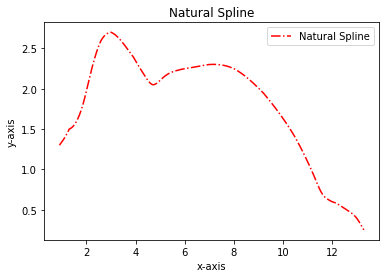

In [80]:
def __naturalCubicSpline(x, y):
    n = len(x)
    h = np.diff(x)
    b = np.zeros(n)
    u = np.zeros(n)
    v = np.zeros(n)
    z = np.zeros(n)
    
    u[1] = 2*(h[0]+h[1])
    v[1] = 6*(y[2]-y[1])/h[1] - 6*(y[1]-y[0])/h[0]
    z[0] = 1
    z[1] = 2
    for i in range(2, n-1):
        u[i] = 2*(h[i-1]+h[i]) - h[i-1]**2/u[i-1]
        v[i] = 6*(y[i+1]-y[i])/h[i] - 6*(y[i]-y[i-1])/h[i-1] - h[i-1]*v[i-1]/u[i-1]
        z[i] = (v[i] - h[i-1]*z[i-1])/u[i]
    for i in range(n-2, 0, -1):
        b[i] = z[i] - h[i]*b[i+1]/u[i]
    b[n-1] = 0
    return b

def cubicSpline(points, xx):
    x = points[:,0]
    y = points[:,1]
    n = len(x)
    b = __naturalCubicSpline(x, y)
    spline = []
    for i in range(n-1):
        if xx >= x[i] and xx <= x[i+1]:
            h = x[i+1] - x[i]
            a = (x[i+1] - xx)/h
            c = (xx - x[i])/h
            yy = a*y[i] + c*y[i+1] + (a**3 - a)*b[i]*h**2/6 + (c**3 - c)*b[i+1]*h**2/6
            spline.append(yy)
            pass
        pass
    return spline[0]

points = np.array([ [0.9, 1.3],
                    [1.3, 1.5],
                    [1.9, 1.85],
                    [2.1, 2.1],
                    [2.6, 2.6],
                    [3.0, 2.7],
                    [3.9, 2.4],
                    [4.4, 2.15],
                    [4.7, 2.05],
                    [5.0, 2.1],
                    [6.0, 2.25],
                    [7.0, 2.3],
                    [8.0, 2.25],
                    [9.2, 1.95],
                    [10.5, 1.4],
                    [11.3, 0.9],
                    [11.6, 0.7],
                    [12.0, 0.6],
                    [12.6, 0.5],
                    [13.0, 0.4],
                    [13.3, 0.25]])

stepSize = 0.01
x_list = np.arange(points[0,0], points[-1,0]+stepSize, stepSize)
result_list = []
for x in x_list:
    if x > points[-1,0]:
        x = points[-1,0]  # 浮点数截断误差会在这里报错，这个循环用于解决报错
        pass
    result_list.append(cubicSpline(points,x))
    pass

line_natural, = plt.plot(x_list,result_list,'r-.',label='Natural Spline')
plt.legend(handles = [line_natural])

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Natural Spline')

plt.savefig("Natural Spline.png", dpi=750, bbox_inches = 'tight')

## (c) Comment on the feasibility of the above methods

In this problem, Natural Spline Method is feasible but Lagrange Interpolation Method is not.

According to the following figure, in the area [2,4], both Lagrange Interpolation and Natural Spline achieve good interpolaton effect. In other area, the interpolation effect of Lagrange Interpolation is poor, while the interpolation effect of Natural Spline is still good. 

The poor interpolation effect of Lagrange Interpolation may caused by Runge Phenomenon, which means these interpolants do not converge to $f$ as $n\to\infty$. This is not a numerical instability, but a fetal flaw that arises when interpolating with high order polynomials at uniformly space points. 

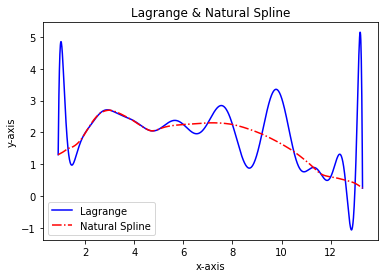

In [81]:
stepSize = 0.01
x_list = np.arange(points[0,0], points[-1,0]+stepSize, stepSize)
result_list_lagrange = []
result_list_natural = []
for x in x_list:
    if x > points[-1,0]:
        x = points[-1,0]  # 浮点数截断误差会在这里报错，这个循环用于解决报错
        pass
    result_list_lagrange.append(lagrangeInterpolation(points,x))
    result_list_natural.append(cubicSpline(points,x))
    pass

line_lagrange,= plt.plot(x_list,result_list_lagrange,'b',label='Lagrange')
line_nutural, = plt.plot(x_list,result_list_natural,'r-.',label='Natural Spline')
plt.legend(handles = [line_lagrange, line_natural])

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Lagrange & Natural Spline')

plt.savefig("Lagrange - Natural Spline", dpi=750, bbox_inches = 'tight')

# Q.5 Linear Equations

The naive approach of polynomial interpolation is that: 

$$
\left[\begin{array}{ccccc}
1 & x_0 & x_0^2 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & \cdots & x_1^n \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_n & x_n & \cdots & x_n^n
\end{array}\right]\left[\begin{array}{c}
c_0 \\
c_1 \\
\vdots \\
c_n
\end{array}\right]=\left[\begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{array}\right]
$$

According to Table 2, we are able to form following linear system through Python code.

In [16]:
points = np.array([ [0.9, 1.3],
                    [1.3, 1.5],
                    [1.9, 1.85],
                    [2.1, 2.1],
                    [2.6, 2.6],
                    [3.0, 2.7],
                    [3.9, 2.4],
                    [4.4, 2.15],
                    [4.7, 2.05],
                    [5.0, 2.1],
                    [6.0, 2.25],
                    [7.0, 2.3],
                    [8.0, 2.25],
                    [9.2, 1.95],
                    [10.5, 1.4],
                    [11.3, 0.9],
                    [11.6, 0.7],
                    [12.0, 0.6],
                    [12.6, 0.5],
                    [13.0, 0.4],
                    [13.3, 0.25]])

x = points[:,0]
y = points[:,1]
y_Vandermonde = np.copy(y)

X_Vandermonde = np.zeros([len(x),len(x)])
for i in range(len(x)):
    for j in range(len(x)):
        X_Vandermonde[i][j] = x[i]**j
        pass
    pass
X_Vandermonde

array([[1.00000000e+00, 9.00000000e-01, 8.10000000e-01, 7.29000000e-01,
        6.56100000e-01, 5.90490000e-01, 5.31441000e-01, 4.78296900e-01,
        4.30467210e-01, 3.87420489e-01, 3.48678440e-01, 3.13810596e-01,
        2.82429536e-01, 2.54186583e-01, 2.28767925e-01, 2.05891132e-01,
        1.85302019e-01, 1.66771817e-01, 1.50094635e-01, 1.35085172e-01,
        1.21576655e-01],
       [1.00000000e+00, 1.30000000e+00, 1.69000000e+00, 2.19700000e+00,
        2.85610000e+00, 3.71293000e+00, 4.82680900e+00, 6.27485170e+00,
        8.15730721e+00, 1.06044994e+01, 1.37858492e+01, 1.79216039e+01,
        2.32980851e+01, 3.02875107e+01, 3.93737639e+01, 5.11858930e+01,
        6.65416609e+01, 8.65041592e+01, 1.12455407e+02, 1.46192029e+02,
        1.90049638e+02],
       [1.00000000e+00, 1.90000000e+00, 3.61000000e+00, 6.85900000e+00,
        1.30321000e+01, 2.47609900e+01, 4.70458810e+01, 8.93871739e+01,
        1.69835630e+02, 3.22687698e+02, 6.13106626e+02, 1.16490259e+03,
        2.2133

## (a) Use Gauss-Elimination

In [17]:
def gaussElimination(A,b):

    # Define augmented matrix M  定义增广矩阵M
    n = len(b)
    M = np.zeros(shape=(n,n+1))
    M[0:n, 0:n] = A 
    M[0:n,n] = b 

    # Strat elimination  开始消元
    # print("Start elimination")
    for col in range(0,n-1):
        for row in range(col+1,n):
            coef = M[row,col] / M[col,col]
            M[row,col:n+1] = M[row,col:n+1] - coef * M[col,col:n+1]
            pass
        # print(M) 
        pass

    # Back substitution  回代
    x = np.zeros(n)
    x[n-1] = M[n-1,n] / M[n-1,n-1]
    for row in range(n-2,-1,-1):
        x[row] = (M[row,n]-M[row,row+1:n].dot(x[row+1:n])) / M[row,row]
        pass

    return x

A = X_Vandermonde
b = y_Vandermonde

print("C:")
print(gaussElimination(A,b))
print("Y:")
print(A.dot(gaussElimination(A, b)))

C:
[-9.62900109e+03  5.23308734e+04 -1.28353328e+05  1.89495703e+05
 -1.89338391e+05  1.36397396e+05 -7.36542206e+04  3.05862459e+04
 -9.93812152e+03  2.55593429e+03 -5.24043290e+02  8.59478924e+01
 -1.12743546e+01  1.17827153e+00 -9.72945654e-02  6.25917429e-03
 -3.06784319e-04  1.10555985e-05 -2.75922145e-07  4.25747987e-09
 -3.05797637e-11]
Y:
[1.3        1.5        1.85       2.1        2.60000001 2.69999997
 2.39999978 2.1499996  2.04999855 2.09999996 2.25000032 2.29998275
 2.24995709 1.9484912  1.4102892  0.88616532 0.68843569 0.52521816
 0.42565822 0.50195074 0.28994603]


## (b) Use LU decomposition

In [18]:
def LUDecomposition(A, b, output=1):

    n = len(b)

    # LU decomposition 
    L = np.zeros(shape=[n,n])
    U = np.zeros(shape=[n,n])

    for i in range(n):
        L[i,i] = 1.0 
        pass

    for j in range(n):
        U[0,j] = A[0,j]
        pass

    for i in range(1,n):
        L[i,0] = A[i,0] / U[0,0] 
        pass

    for k in range(1,n):
        for j in range(k,n):
            U[k,j] = A[k,j] - (L[k,0:k]).dot(U[0:k,j])
            pass
        for i in range(k+1,n):
            L[i,k] = (A[i,k]-(L[i,0:k]).dot(U[0:k,k])) / U[k,k]
            pass
        pass

    # Back Substitution 
    y = np.zeros(n)
    y[0] = b[0] / L[0,0]
    for i in range(1,n):
        y[i] = (b[i] - (L[i,0:i]).dot(y[0:i])) / L[i,i]
        pass

    x = np.zeros(n)
    x[n-1] = y[n-1] / U[n-1,n-1]

    for i in range(n-2,-1,-1):
        x[i] = (y[i] - U[i,i+1:n].dot(x[i+1:n])) / U[i,i] 
        pass
    
    if output == 0:
        return x
        pass
    else:
        return L,U,y,x
        pass
    pass

A = X_Vandermonde
b = y_Vandermonde

# L_LU,U_LU,y_LU,x_LU = LUDecomposition(A,b,output=1)  # 完整输出格式
print("C:")
print(LUDecomposition(A, b, output=0))  # 仅输出解
print("Y:")
print(A.dot(LUDecomposition(A, b, output=0)))


C:
[-9.60454784e+03  5.21953487e+04 -1.28013353e+05  1.88980865e+05
 -1.88809167e+05  1.36003965e+05 -7.34343002e+04  3.04914228e+04
 -9.90603943e+03  2.54731981e+03 -5.22194910e+02  8.56299984e+01
 -1.12305538e+01  1.17345714e+00 -9.68760682e-02  6.23081593e-03
 -3.05319883e-04  1.09999978e-05 -2.74460563e-07  4.23373827e-09
 -3.04003669e-11]
Y:
[1.3        1.5        1.85       2.1        2.60000001 2.69999999
 2.40000019 2.15000003 2.05000054 2.10000119 2.25000071 2.29998096
 2.24981063 1.95233616 1.39107481 0.86823118 0.6876788  0.61568348
 0.56987325 0.5301626  0.47582178]


## (c) Use Gauss-Seidel method, and comment on the convergence

$$
\boldsymbol{x}^{(k)}=\mathbf{T}_g \boldsymbol{x}^{(k-1)}+\boldsymbol{c}_g
$$
$$
\mathbf{T}_g=-(\mathbf{D}+\mathbf{L})^{-1} \mathbf{U}\quad 
\mathbf{c}_g=(\mathbf{D}+\mathbf{L})^{-1} \mathbf{b}
$$

结果好像发散了，后面检查一下

In [19]:
def GaussSeidel(A,b,x0,iter):

    length = len(A)

    L = np.array(list(A))
    U = np.array(list(A))
    D = np.array(list(A))
    Dinv = np.zeros([length,length])

    for i in range(length):
        for j in range(length):
            if i > j:
                U[i][j] = 0
                D[i][j] = 0
            elif i < j:
                L[i][j] = 0
                D[i][j] = 0
            else:
                U[i][j] = 0
                L[i][j] = 0

    DLinv = np.linalg.inv(D+L)
    T = -DLinv.dot(U)
    c = DLinv.dot(b)

    x = x0
    for i in range(iter):
        x = T.dot(x) + c
        # print('iter = ' + str(i+1))
        # print('x = ' + str(x))

    return x 
    pass

# x0 = np.zeros(len(y_Vandermonde)).reshape(len(y_Vandermonde),1)
iter = int(1e8)
A = X_Vandermonde
b = y_Vandermonde.reshape(len(y_Vandermonde),1)

x0 = (LUDecomposition(A, b, output=0)).reshape(len(y_Vandermonde),1)


C_Estimate = GaussSeidel(A,b,x0,iter)
print("C:")
print(C_Estimate.T)  # 结果发散了
print("Y:")
print((A.dot(C_Estimate)).T)

C:
[[-9.57509941e+03  5.20044290e+04 -1.27504151e+05  1.88225170e+05
  -1.88101313e+05  1.35555922e+05 -7.32348966e+04  3.04276692e+04
  -9.89130546e+03  2.54488707e+03 -5.21920172e+02  8.56115238e+01
  -1.12302917e+01  1.17353356e+00 -9.68832875e-02  6.23105202e-03
  -3.05317959e-04  1.09998140e-05 -2.74473905e-07  4.23471322e-09
  -3.04175759e-11]]
Y:
[[ 1.29999944  1.49045179  1.78416732  2.0770424   2.61262423  2.68436059
   2.36787257  2.11955129  2.02928126  2.09002521  2.10958594  2.37820526
   2.13920972  1.0989602   5.62016644 -1.78129865 -1.90766575  2.31162314
   2.16976309 -1.65433529 -0.00844957]]


## (d) SOR method (select your own ω), and comment on the convergence

$$
\boldsymbol{x}^{(k)}=\mathbf{T}_\omega \boldsymbol{x}^{(k-1)}+\boldsymbol{c}_\omega
$$
$$
\mathbf{T}_\omega=(\mathbf{D}+\omega \mathbf{L})^{-1}((1-\omega) \mathbf{D}-\omega \mathbf{U})\quad \mathbf{c}_\omega=\omega(\mathbf{D}+\omega \mathbf{L})^{-1}
$$
结果好像发散了，后面检查一下

In [20]:
A = np.array([[3,-1,1],[3,6,2],[3,3,7]])
b = np.array([[1],[0],[4]])
iter = 2
x0 = np.array([[0],[0],[0]])
w = 1.1

def SOR(A,b,x0,iter,w=1.1):
    
    length = len(A)

    L = np.array(list(A))
    U = np.array(list(A))
    D = np.array(list(A))
    Dinv = np.zeros([length,length])

    for i in range(length):
        for j in range(length):
            if i > j:
                U[i][j] = 0
                D[i][j] = 0
            elif i < j:
                L[i][j] = 0
                D[i][j] = 0
            else:
                U[i][j] = 0
                L[i][j] = 0

    DwLinv = np.linalg.inv(D+w*L)
    T = DwLinv.dot((1-w)*D-w*U)
    c = w*DwLinv.dot(b)

    x = x0
    for i in range(iter):
        x = T.dot(x) + c
        # print('iter = ' + str(i+1))
        # print('x = ' + str(x))

    return x
    pass

# x0 = np.zeros(len(y_Vandermonde)).reshape(len(y_Vandermonde),1)
iter = int(1e8)
A = X_Vandermonde
b = y_Vandermonde.reshape(len(y_Vandermonde),1)

x0 = (LUDecomposition(A, b, output=0)).reshape(len(y_Vandermonde),1)

C_Estimate = SOR(A,b,x0,iter,w)
print("C:")
print(C_Estimate.T)  # 结果发散了
print("Y:")
print((A.dot(C_Estimate)).T)

C:
[[-9.55307041e+03  5.18935660e+04 -1.27246559e+05  1.87856773e+05
  -1.87741276e+05  1.35304412e+05 -7.31065119e+04  3.03791843e+04
  -9.87766967e+03  2.54202929e+03 -5.21477039e+02  8.55616798e+01
  -1.12264020e+01  1.17334530e+00 -9.68797953e-02  6.23120067e-03
  -3.05325732e-04  1.09996343e-05 -2.74452265e-07  4.23415006e-09
  -3.04131697e-11]]
Y:
[[ 1.28710334  1.50000439  1.82505243  2.08743114  2.57381773  2.66406647
   2.37484268  2.13581722  2.05875828  2.12278433  2.11784368  2.71180833
   1.49958413  2.76569605  4.98578056 -5.28357834 -1.42907167  6.8665446
  -3.92891614  0.67664833  0.99699452]]


## (e) Appendix 1. Q5 Algorithm validity verification

In [21]:
A = np.array([[3,-1,1],[3,6,2],[3,3,7]])
b = np.array([[1],[0],[4]])
iter = 10
x0 = np.array([[0],[0],[0]])
w = 1.1
print(gaussElimination(A,b.reshape(1,3)[0]))
print(LUDecomposition(A,b.reshape(1,3)[0],0))
print(GaussSeidel(A,b,x0,iter).T)
print(SOR(A,b,x0,iter).T)

[ 0.03508772 -0.23684211  0.65789474]
[ 0.03508772 -0.23684211  0.65789474]
[[ 0.03508864 -0.23684191  0.65789426]]
[[ 0.03507936 -0.23683491  0.65789548]]


# Q.6 Eigenvalue

## (a) Use power iteration method to determine the main eigenvalue

Initialisation: Given a initial vector $q^{(0)} \in C_n$ where $\left\|\boldsymbol{q}^{(0)}\right\|_2=1$

Data: Specify the tolerance $\varepsilon$ and define $k = 0$

Input: $q^{(0)}$ and $\varepsilon$

Do

$$
\begin{aligned}
& k=k+1 \\
& \boldsymbol{z}^{(k)}=\mathbf{A} \boldsymbol{q}^{(k-1)} \\
& \boldsymbol{q}^{(k)}=\boldsymbol{z}^{(k)} /\left\|\boldsymbol{z}^{(k)}\right\|_2 \\
& \lambda^{(k)}=\left(\boldsymbol{q}^{(k)}, \mathbf{A} \boldsymbol{q}^{(k)}\right)
\end{aligned}
$$

while $\left(\left\|\boldsymbol{q}^{(k)}-\boldsymbol{q}^{(k-1)}\right\|_2>\varepsilon\right)$ ;

In [52]:
def powerIteration(A, maxIter, eps=1e-12, q=np.random.rand(len(A)).reshape(len(A),1)):

    q1 = q
    q1 = q1 / np.linalg.norm(q1)
    k = 0
    residual = 10000

    while (residual > eps and k < maxIter):

        q0 = q1
        k = k + 1
        z = A.dot(q0)
        q1 = z / np.linalg.norm(z)
        lam = (q1.T).dot(A.dot(q1))
        residual = np.linalg.norm(q1-q0)
        pass
    
    return lam, q1
    pass

A = np.array([[52, 30, 49, 28],[30, 50, 8, 44],[49, 8, 46, 16],[28, 44, 16, 22]]) 

lam, q = powerIteration(A,10)
print("The main eigenvalue is: ")
print(lam[0,0])
print("The corresponding eigenvector is: ")
print(q)

The main eigenvalue is: 
132.62787533321196
The corresponding eigenvector is: 
[[0.6094606 ]
 [0.48785053]
 [0.46657993]
 [0.41576773]]


## (b) Use Rayleigh Quotient method to determine the main eigenvalue and comment on the convergence rate.

In [53]:
def Reyleigh_quotient_iteration(A, maxIter=1000, eps=1e-12, q=np.random.rand(len(A))):

    q0 = q
    for i in range(maxIter):

        q1 = q0.T.dot(A).dot(q0)/q0.T.dot(q0)
  
        A_inv = np.linalg.inv(A-q1*np.identity(A.shape[0]))

        q0 = A_inv.dot(q0)
        q0 = q0/np.linalg.norm(q0)
        pass

    lam = q0.T.dot(A).dot(q0)/q0.T.dot(q0)

    return lam, q0

A = np.array([[52, 30, 49, 28],[30, 50, 8, 44],[49, 8, 46, 16],[28, 44, 16, 22]]) 

lam, q = Reyleigh_quotient_iteration(A)
print("The main eigenvalue is: ")
print(lam)
print("The corresponding eigenvector is: ")
print(q)

The main eigenvalue is: 
132.6278753342084
The corresponding eigenvector is: 
[0.60945955 0.48785283 0.4665778  0.41576896]


In [74]:
# Comment on the convergence rate 

A = np.array([[52, 30, 49, 28],[30, 50, 8, 44],[49, 8, 46, 16],[28, 44, 16, 22]]) 
eigenValue, eigenVector = np.linalg.eig(A)
eigenValue = max(eigenValue)
print('Iter\teigenValue\t\teigenValue_pow\t\trelativeError_pow\teigenValue_Rey\t\trelativeError_Rey')

for iter in range(10):
    q=np.random.rand(len(A))
    eigenValue_pow, eigenVector_pow = powerIteration(A,iter+1,eps=1e-12,q=q) 
    eigenValue_pow = eigenValue_pow
    eigenValue_Rey, eigenVector_Rey = Reyleigh_quotient_iteration(A,iter+1,eps=1e-12,q=q) 
    print(str(iter+1)+'\t'+str(eigenValue)+'\t'+str(eigenValue_pow)+'\t'+str(abs(eigenValue_pow-eigenValue))+'\t'+str(eigenValue_Rey)+'\t'+str(abs(eigenValue_Rey-eigenValue)))
    pass


Iter	eigenValue		eigenValue_pow		relativeError_pow	eigenValue_Rey		relativeError_Rey
1	132.6278753342084	132.549554855785	0.07832047842339307	132.59851612981592	0.029359204392477523
2	132.6278753342084	132.61850105409405	0.009374280114343492	132.6278753342035	4.888534022029489e-12
3	132.6278753342084	132.6271141299634	0.0007612042450091394	132.62787533420837	2.842170943040401e-14
4	132.6278753342084	132.62614481620926	0.0017305179991353725	132.6278753342084	0.0
5	132.6278753342084	132.62786232537835	1.3008830052285703e-05	132.6278753342084	0.0
6	132.6278753342084	132.62783220514876	4.3129059633884026e-05	132.6278753342084	0.0
7	132.6278753342084	132.62785601436815	1.931984024849953e-05	132.62787533420837	2.842170943040401e-14
8	132.6278753342084	132.62787116484125	4.1693671448683745e-06	132.6278753342084	0.0
9	132.6278753342084	132.6278753202854	1.3922999642090872e-08	132.62787533420837	2.842170943040401e-14
10	132.6278753342084	132.62787513953992	1.94668473341153e-07	132.6278753342083

## (c) Use QR decomposition to determine how many eigenvalues are positive and how many are negative

In [25]:
def eigQR(A, maxIter=1000, eps=1e-12): 

    q, r = np.linalg.qr(A)
    A0 = np.copy(A)

    for i in range(9):
        A = r.dot(q)
        q, r = np.linalg.qr(A) 
        pass

    gamma0 = np.diag(A)
    gamma = np.copy(gamma0)
    n = len(gamma0)
    vectors = np.zeros((n,n))

    for i in range(n):
        Ai = A0 - gamma0[i] * np.eye(n)
        invAi = np.linalg.inv(Ai)
        residual = 1e5
        u = np.ones([n,1])
        k = 0
        # eps = 1e-12
        while ((k < maxIter) and (residual > eps)):
            v = invAi.dot(u)
            m = max(v, key=abs)
            v = v/max(np.abs(v))
            residual = np.linalg.norm(u-v, ord=2)
            u = v
            k = k + 1
            pass
        gamma[i] = gamma0[i] + (1/m)
        vectors[:,i] = v[:,0]
        pass
    
    return gamma, vectors  # gamma is eigenvalue and vectors is eigenvector
    pass

A = np.array([[52, 30, 49, 28],[30, 50, 8, 44],[49, 8, 46, 16],[28, 44, 16, 22]])
lam, q = eigQR(A)

print("The eigenvalues are: ")
print(lam)
print("2 eigenvalues are positive and 2 eigenvalues are negative. \n")

print("The corresponding eigenvectors are: ")
print(q)

The eigenvalues are: 
[132.62787533  52.44230217 -11.54113073  -3.5290446 ]
2 eigenvalues are positive and 2 eigenvalues are negative. 

The corresponding eigenvectors are: 
[[ 1.         -0.4600014   0.12811987 -1.        ]
 [ 0.80046795  1.         -0.74047838  0.08347191]
 [ 0.76555992 -0.92325971 -0.2842149   0.83757963]
 [ 0.68219288  0.53700954  1.          0.42798162]]
